In [1]:
import os, json
import pandas as pd
import numpy as np

path_to_json = '/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/matches/1238/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files) 

['108.json']


In [2]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/matches/1238/'
for file in json_files:
    print(filepath + file)

/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/matches/1238/108.json


In [3]:
filepath = '/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/matches/1238/'

match_list=[]

for file in json_files:
    df_matches=pd.read_json(filepath + file)
    match_list.extend(df_matches['match_id'].values)

In [4]:
print(match_list)

[3827767, 3827335, 3827336, 3827338, 3827337, 3817856, 3817891, 3817870, 3817899, 3817866, 3817889, 3817887, 3817872, 3817900, 3817855, 3817863, 3817877, 3817901, 3817880, 3817902, 3817862, 3817873, 3817869, 3817881, 3817895, 3817884, 3817896, 3817852, 3817883, 3817886, 3817864, 3817882, 3817894, 3817871, 3817861, 3817888, 3817875, 3817868, 3817867, 3813313, 3817890, 3813302, 3817857, 3817898, 3817893, 3817854, 3817892, 3817859, 3817858, 3817897, 3817885, 3817878, 3817876, 3813305, 3813266, 3813271, 3813311, 3813303, 3813304, 3813306, 3813283, 3813275, 3813278, 3813295, 3813296, 3813282, 3813269, 3817879, 3817874, 3817865, 3817860, 3817853, 3817851, 3817850, 3817849, 3817848, 3813318, 3813287, 3813270, 3813307, 3813279, 3813281, 3813274, 3813285, 3813317, 3813316, 3813315, 3813314, 3813312, 3813310, 3813309, 3813308, 3813301, 3813300, 3813299, 3813298, 3813297, 3813294, 3813293, 3813292, 3813291, 3813290, 3813289, 3813288, 3813286, 3813284, 3813280, 3813277, 3813276, 3813273, 3813272, 

In [5]:
def dict_to_dataframe(a):
    dataframe = df_match[a].apply(pd.Series)
    dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
    return dataframe 

filepath = '/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/matches/1238/'

appended_data = []

for file in json_files:
    df_match = pd.read_json(filepath + file)
    
    df_home_team = dict_to_dataframe("home_team")
    df_away_team = dict_to_dataframe("away_team")

    frames = [df_match, df_home_team, df_away_team]

    df = pd.concat(frames, axis = 1)

    df = df[['match_id', 'home_team_home_team_name', 'away_team_away_team_name']]
    appended_data.append(df)
# see pd.concat documentation for more info
appended_data = pd.concat(appended_data)

In [6]:
appended_data

,match_id,home_team_home_team_name,away_team_away_team_name
0,3827767,Hyderabad,Kerala Blasters
1,3827335,Kerala Blasters,Jamshedpur
2,3827336,ATK Mohun Bagan,Hyderabad
3,3827338,Hyderabad,ATK Mohun Bagan
4,3827337,Jamshedpur,Kerala Blasters
...,...,...,...
110,3813272,Goa,Hyderabad
111,3813268,Jamshedpur,ATK Mohun Bagan
112,3813267,East Bengal,Goa
113,3813265,East Bengal,Mumbai City


In [7]:
#temporary_match_list = [69225, 69212] #(27, 23/ (25, 23)/ (18, 23))


shot_appended_data = []
for match in match_list:

    filepath = "/Users/aritramajumdar/Downloads/statsbomb_new/open-data/data/events/"
    match_id = str(match)

    df = pd.read_json(filepath+match_id+".json")


    cols = ['tactics', 'related_events']
    df = df.drop(cols, axis = 1)


    def dict_to_dataframe(a):
        dataframe = df[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 


    df_type = dict_to_dataframe("type")
    df_possession_team = dict_to_dataframe("possession_team")
    df_play_pattern = dict_to_dataframe("play_pattern")
    df_team = dict_to_dataframe("team")
    df_player = dict_to_dataframe("player")
    df_position = dict_to_dataframe("position")
    df_pass = dict_to_dataframe("pass")
    df_shot = dict_to_dataframe("shot")


    
    a = ['type', 'possession_team', 'play_pattern', 'team',
       'player', 'position', 'pass', 'shot']

    df = df.drop(a, axis = 1)

    frames = [df_type, df_play_pattern, df_team,
             df_player, df_position, df_pass, df_shot, df_possession_team]

    df_total = pd.concat(frames, axis = 1)

    frames1 = [df, df_total]

    df_final = pd.concat(frames1, axis = 1)

    shot_col = [col for col in df_total if col.startswith('shot')]
    
    df_extra = df_final[['id', 'index', 'period', 'timestamp', 'minute', 
                     'second', 'possession', 'duration', 'location', 
                     'under_pressure', 'type_name', 'play_pattern_name',
                     'pass_height', 'pass_type', 'possession_team_name', 'player_id', 'player_name']]

    df_shot = df_final[shot_col]


    frames2 = [df_extra, df_shot]
    shots = pd.concat(frames2, axis = 1)

    b = ['shot_0','shot_key_pass_id']
    shots = shots.drop(b, axis = 1)


    def dict_to_dataframe(a):
        dataframe = shots[a].apply(pd.Series)
        dataframe.columns = [str(a) + "_" + str(col) for col in dataframe.columns]
        return dataframe 

    df_shot_type = dict_to_dataframe("shot_type")
    df_shot_technique = dict_to_dataframe("shot_technique")
    df_shot_outcome = dict_to_dataframe("shot_outcome")
    df_shot_body_part = dict_to_dataframe("shot_body_part")
    df_pass_height = dict_to_dataframe("pass_height")
    df_pass_type = dict_to_dataframe("pass_type")


    frames3 = [df_shot_type, df_shot_technique, df_shot_outcome, df_shot_body_part, df_pass_height, df_pass_type]

    df_shot_data = pd.concat(frames3, axis = 1)

    c = ["shot_type", "shot_technique", "shot_outcome", "shot_body_part", "pass_height", "pass_type"]

    shots = shots.drop(c, axis = 1)

    frames4 = [shots, df_shot_data]

    shots_data = pd.concat(frames4, axis=1)

    shots_data = shots_data[['id', 'index', 'period', 'timestamp', 'minute', 'second', 'possession', 
                             'possession_team_name', 'player_id', 'player_name',
                           'duration', 'location', 'under_pressure', 'type_name',
                            'play_pattern_name', 'pass_height_name',
                           'shot_end_location', 'shot_freeze_frame',
                           'shot_type_name', 'shot_technique_name', 
                           'shot_outcome_name', 'shot_body_part_name','shot_statsbomb_xg']]


    shots_data['previous_type_name'] = shots_data['type_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['pass_height_name'].shift(1)
    shots_data['previous_pass_height_name'] = shots_data['previous_pass_height_name'].ffill(axis = 0)

    shots_data = shots_data[shots_data['type_name'] == 'Shot']

    shots_data["location_x"] = shots_data["location"].str[0]
    shots_data["location_y"] = shots_data["location"].str[1]

    shots_data["shot_end_location_x"] = shots_data["shot_end_location"].str[0]
    shots_data["shot_end_location_y"] = shots_data["shot_end_location"].str[1]


    d = ['type_name', 'pass_height_name', 'location', 'shot_end_location']
    shots_data = shots_data.drop(d, axis = 1)  
    
    shots_data['match_id'] = int(match)
    shot_appended_data.append(shots_data)
    

shot_appended_data = pd.concat(shot_appended_data)

In [8]:
shots_data_final = pd.merge(shot_appended_data, appended_data, on='match_id')
shots_data_final['home_away'] = np.where((shots_data_final['possession_team_name'] == shots_data_final['home_team_home_team_name']), 
                                         'Home', 'Away')


#e = ['home_team_home_team_name', 'away_team_away_team_name']
#shots_data_final = shots_data_final.drop(e, axis = 1)

In [9]:
shots_data_final

,id,index,period,timestamp,minute,second,possession,possession_team_name,player_id,player_name,...,previous_type_name,previous_pass_height_name,location_x,location_y,shot_end_location_x,shot_end_location_y,match_id,home_team_home_team_name,away_team_away_team_name,home_away
0,f4889f42-cf51-4c27-8c8d-d57040b17ce1,368,1,2022-11-24 00:10:08.014,10,8,26,Hyderabad,164490.0,Souvik Chakrabarti,...,Pressure,Ground Pass,90.8,19.0,119.0,38.7,3827767,Hyderabad,Kerala Blasters,Home
1,3e3c20ab-5233-479f-877e-73b94d01a963,495,1,2022-11-24 00:13:50.965,13,50,31,Kerala Blasters,28251.0,Jorge Rolando Pereyra Díaz,...,Ball Receipt*,High Pass,111.8,39.3,120.0,35.4,3827767,Hyderabad,Kerala Blasters,Away
2,f6fa4021-385f-4353-9e41-81a9ade1d2ac,731,1,2022-11-24 00:20:16.861,20,16,44,Kerala Blasters,163354.0,Rahul Kannoly Praveen,...,Carry,Ground Pass,93.9,49.1,120.0,45.6,3827767,Hyderabad,Kerala Blasters,Away
3,3c75ac72-8c43-4ca4-b6f4-2d38dc58c8c7,1069,1,2022-11-24 00:29:18.678,29,18,68,Kerala Blasters,26304.0,Adrián Nicolás Luna Retamar,...,Carry,Low Pass,90.2,18.8,94.5,22.3,3827767,Hyderabad,Kerala Blasters,Away
4,49c30b55-a2df-4b6e-84fa-101457ed2d08,1356,1,2022-11-24 00:38:25.380,38,25,82,Kerala Blasters,24035.0,Álvaro Vázquez García,...,Ball Receipt*,Ground Pass,104.5,55.9,119.9,37.6,3827767,Hyderabad,Kerala Blasters,Away
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,afcb0f9b-b091-45d1-8908-c315ef442c2c,2643,2,2022-11-24 00:34:27.087,79,27,149,Hyderabad,163353.0,Seityasen Singh,...,Ball Receipt*,High Pass,108.6,33.4,118.7,36.0,3813264,ATK Mohun Bagan,Hyderabad,Away
3091,5b1584ca-2c81-48b5-9958-1a63305e9e4d,2648,2,2022-11-24 00:35:02.379,80,2,150,Hyderabad,164483.0,Juan Antonio González Fernández,...,Duel,High Pass,114.5,44.7,117.6,42.8,3813264,ATK Mohun Bagan,Hyderabad,Away
3092,505c3c52-3618-474f-81bb-b6f5b66cce9a,2698,2,2022-11-24 00:38:33.655,83,33,160,Hyderabad,163353.0,Seityasen Singh,...,Carry,High Pass,102.2,48.6,107.0,47.1,3813264,ATK Mohun Bagan,Hyderabad,Away
3093,1732c372-68e7-49d5-bd45-0acba3bf34bf,2703,2,2022-11-24 00:38:34.834,83,34,160,Hyderabad,163353.0,Seityasen Singh,...,Carry,High Pass,102.1,49.1,108.3,44.5,3813264,ATK Mohun Bagan,Hyderabad,Away


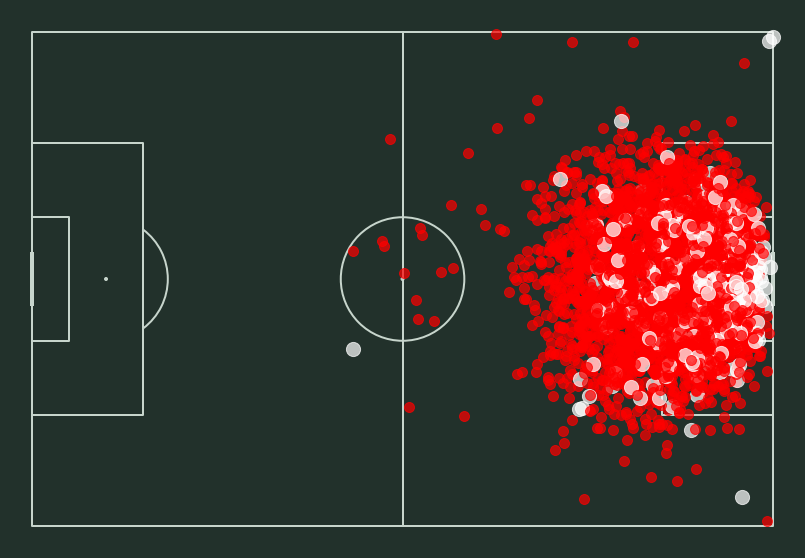

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

from mplsoccer.pitch import Pitch
from mplsoccer.pitch import VerticalPitch

fig, ax = plt.subplots(figsize=(20, 10))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

"""
#The statsbomb pitch from mplsoccer
pitch = VerticalPitch(pitch_type='statsbomb',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True, half = True)
"""
# Setup the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc', 
              figsize=(16, 11), constrained_layout=True, tight_layout=False)


pitch.draw(ax = ax)
plt.gca().invert_yaxis()

for x in range(len(shots_data_final['location_x'])):
    if shots_data_final['shot_outcome_name'].iloc[x] == 'Goal':
        #plt.plot((passes['x'].iloc[x],passes['end_x'].iloc[x]),(passes['y'].iloc[x],passes['end_y'].iloc[x]),color='green')
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'w', s=200, alpha = 0.7)
    else:
        plt.scatter(shots_data_final['location_x'].iloc[x], shots_data_final['location_y'].iloc[x], c = 'r', s=100, alpha = 0.7)
        
    

In [11]:
shots_data_final.to_excel("ISL.xlsx")